# BooK Rating Group Project

## Kheirie Kaderi, Mohamed Al Jalanji, Clemence ROLDAN

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
### Clemence ###
# df = pd.read_csv("books.csv",sep=",",index_col="bookID")
# # note : I had to modify 4 lines in the csv file for it to work, there were comas in 4 authors names
# print(df.head(10))

In [6]:
### Kheirie ###
# Specify the filename
filename = 'books.csv'
updated_filename = "books_updated.csv"

## In some cases in certain fields such us author the authors are separated by ", " 
## to avoid problems when reading the csv directly using pandas and to retain all rows the following steps done

# Open the file and read lines
with open(filename, 'r', encoding='utf-8') as file: # utf-8 encoding to support all languages since there are non-english content
    lines = file.readlines()

# Process the lines to handle unwanted delimiters
cleaned_lines = []
is_firstline = True # used to avoid updating the first line

for line in lines:
    
    if is_firstline: # if it is the first line i.e. Header do not update it
        is_firstline = False
        cleaned_lines.append(line)
        continue
    cleaned_line = line.replace(', ', '/')

    # Append the cleaned line
    cleaned_lines.append(cleaned_line)

# rejoin all the lines to create a new updated csv
with open(updated_filename, 'w', encoding='utf-8') as output_file:
    for cleaned_line in cleaned_lines:
        output_file.write(cleaned_line + '\n')
        
# Read the cleaned data into a DataFrame
df = pd.read_csv(updated_filename, delimiter = ",", encoding = 'utf-8', index_col=False) 
# Note: Did not use BookID as an index this can cause potential problems when navigating and updating the DataFrame
#       since the numbers do not follow eachother - between one row and another there can be numbers skipped 


In [7]:
### Kheirie ###
# Check the first 5 rows
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
### Kheirie ###
# Check the last 5 rows
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [9]:
### Kheirie ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  object 
 10  publication_date    11127 non-null  object 
 11  publisher           11126 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [11]:
### Kheirie ###
# .sample() is important to see random content of the DataFrame
df.sample(5) 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
9579,38150,Orlando: A Biography: Film Screenplay,Sally Potter/Virginia Woolf,4.07,0571172954,9780571172955,eng,75,84,7,10/25/2013,Faber & Faber
7974,30562,Complete Essays 1 1920-25,Aldous Huxley/Robert S. Baker/James Sexton,4.33,1566633222,9781566633222,en-GB,480,16,2,10/30/2000,Ivan R. Dee Publisher
6204,23352,Lord of the Flies,William Golding,3.68,0812416112,9780812416114,en-US,208,479,57,7/1/1959,Perfection Learning
5265,19040,No More Water in the Tub!,Tedd Arnold/Mark Buehner,3.95,0140564306,9780140564303,eng,32,214,38,12/1/1998,Puffin Books
1040,3529,The World's First Love: Mary Mother of God,Fulton J. Sheen,4.59,0898705975,0008987059752,en-US,276,641,63,9/1/1996,Ignatius Press


In [12]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [13]:
### Kheirie ###
# Remove the space before the column num_pages, for ease of use
df.rename(columns={'  num_pages': '  num_pages'.replace(' ', '')}, inplace=True)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [14]:
### Clemence ###
types_columns=df.dtypes
number_lines,number_columns=df.shape
print(types_columns)

bookID                 object
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count     object
publication_date       object
publisher              object
dtype: object


In [15]:
### Clemence ###
print('Out of ',number_columns, 'columns only 5 are of numerical types')

Out of  12 columns only 5 are of numerical types


In [16]:
### Kheirie ###
# investigate if their are non-numerical non-date types in supposedly numerical and date columns

# text_reviews_count 
# Filter the DataFrame to get non-numerical values in the specified column
def check_non_numerical_date(columns_list: list, intended_type: str):
    
    if intended_type == "numerical":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_numeric, errors='coerce').notna()]
            print("The non_numerical_values in column {} : ".format(column), non_numerical_values[column])

    elif intended_type == "date":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_datetime, errors='coerce').notna()]
            print("The non_date_values in column {} : ".format(column), non_numerical_values[column])
    
# Display the non-numerical and non_date values of the selected columns
columns = ["isbn", "isbn13", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")
check_non_numerical_date(["publication_date"], "date")

The non_numerical_values in column isbn :  3        043965548X
12       076790818X
16       076790382X
27       097669400X
40       006076273X
            ...    
11090    030727411X
11101    074347788X
11106    057305133X
11110    843221728X
11115    972233168X
Name: isbn, Length: 985, dtype: object
The non_numerical_values in column isbn13 :  1847    en-US
Name: isbn13, dtype: object
The non_numerical_values in column text_reviews_count :  1847    9/1/2003
Name: text_reviews_count, dtype: object
The non_date_values in column publication_date :  1847      MTV Books
8180     11/31/2000
11098     6/31/1982
Name: publication_date, dtype: object


-- Kheirie --

From the above investigation one can notice the following : 
- isbn is not numerical since some of the isbn codes end with X 
- we notice that at index location 1847 the data is shifted to the left
- dates at index locations 8180 and 11098 were not considered as dates since they are wrong. June and November are 31 days, but in reality they are only 30 days. 

In [17]:
### Clemence ###
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             1
dtype: int64

--- Clemence ---

There is no empty cells, so no engineering needed to replace emplty cells.

--- Kheirie ---

There is one empty cell in publisher column, I assume it is on index location 1847. Lets investiagte this row.

In [18]:
### Kheirie ###
df.iloc[1847]

bookID                6549/ said the shotgun to the head.
title                                       Saul Williams
authors                                              4.22
average_rating                                743470796.0
isbn                                        9780743470797
isbn13                                              en-US
language_code                                         192
num_pages                                            2762
ratings_count                                         214
text_reviews_count                               9/1/2003
publication_date                                MTV Books
publisher                                             NaN
Name: 1847, dtype: object

--- Kheirie --- 

We notice that there is a / in the bookID which separates the BookID from the book title. This must be a result from updating automatically the csv files at the beginning. 
Below is the code to fix this unwanted mistake

In [19]:
### Kheirie ###
# Split 'bookID' by "/" to create a list containing bookID and title content
bookid_title = df["bookID"].iloc[1847].split('/')


# content of the remaining columns
remaining_columns = df[['title', 'authors', 'average_rating', 'isbn', 'isbn13',
                                   'language_code', 'num_pages', 'ratings_count', 
                                   'text_reviews_count', 'publication_date']].iloc[1847]


# rearrange cells content for each column
df.iloc[1847, 2:] = remaining_columns
df["bookID"].iloc[1847]= bookid_title[0]
df["title"].iloc[1847]= bookid_title[1]


C:\Users\kader\AppData\Local\Temp\ipykernel_34208\1078055645.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.22' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_34208\1078055645.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_34208\1078055645.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bookID"].iloc[1847]= bookid_title[0]
C:\Users\kader\AppD

In [20]:
### Kheirie ###
# rechek the content 
df.iloc[1847]

bookID                                          6549
title                  said the shotgun to the head.
authors                                Saul Williams
average_rating                                  4.22
isbn                                     743470796.0
isbn13                                 9780743470797
language_code                                  en-US
num_pages                                        192
ratings_count                                   2762
text_reviews_count                               214
publication_date                            9/1/2003
publisher                                  MTV Books
Name: 1847, dtype: object

In [23]:
### Kheirie ###
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  object
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  object
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


--- Kheirie ---

For some reasons the supposedly numerical columns became objects 
Re-investigate again if they contain non-numerical content

In [26]:
### Kheirie ###
# re-investigate if there is non-numerical content in supposedly numerical columns
columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")

The non_numerical_values in column average_rating :  Series([], Name: average_rating, dtype: float64)
The non_numerical_values in column isbn13 :  Series([], Name: isbn13, dtype: int64)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: int64)
The non_numerical_values in column num_pages :  Series([], Name: num_pages, dtype: int64)
The non_numerical_values in column ratings_count :  Series([], Name: ratings_count, dtype: int64)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: int64)


--- Kheirie --- 

They do not contain non-numerical content, so will transform them to numerical

In [27]:
# convert to numerical
def convert_to_numerical(columns_list: list):
    
    for column in columns_list:
        df[column] = df[column].apply(pd.to_numeric)

columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]

convert_to_numerical(columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [28]:
### Clemence ###
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


--- Clemence ---

We see above the description of those 5 numerical columns : 
- The first one is the "average_rating", it's the target column. It's made of float, that goes from 0 to 5, with a mean at 3,9.
- The second one is the isbn13 (International Standard Book Number). It's made of integer but it's a number used to identify books, the numerical values don't have valid informations.
- The num_pages refer to the number of page, we see that the min is 0 : we should investigate it.
- the ratings_count and the text_reviews_count are the number of ratings and the number of text_reviews the book received in goodreads : we see that there is far more ratings than text_reviews, which seems normal. We see that the mean and the median are really different for those columns, we should investigate it.

# Book with 0 or few pages

In [29]:
### Clemence ###
df.loc[df['num_pages']==0,:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10030,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
10192,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
10624,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio
10926,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books


To see how we can replace them, we need to understand the link between number of pages and rating

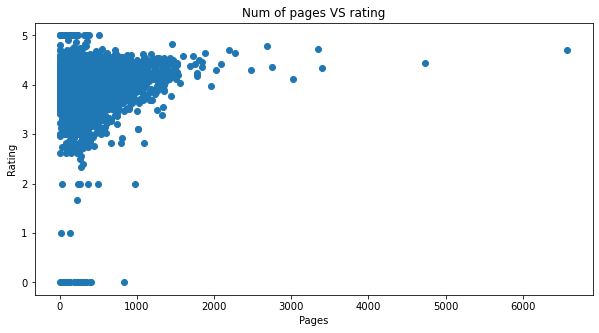

In [ ]:
### Clemence ###
### Note: Kheirie stopped here ###

plt.figure(figsize=(10,5))
plt.scatter(df['  num_pages'],df['average_rating'])
plt.title("Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.show()

There seems to be a lot of book with very few pages. Let's see this further

In [ ]:
few_pages=df.loc[df['  num_pages']<50,:]

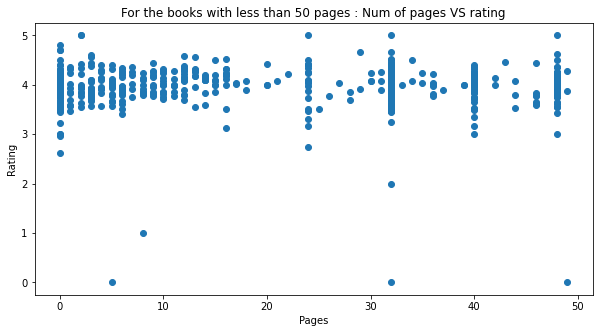

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(few_pages['  num_pages'],few_pages['average_rating'])
plt.title("For the books with less than 50 pages : Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.show()

It's hard to believe than that there is that much books with less than 50 pages (especially those with less than 10 pages !) with those high ratings. There must be errors in the data.

In [ ]:
df.loc[df['  num_pages']<10,:]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,3/23/2005,Random House Audio
524,Lord of the Flies,William Golding,3.68,0307281701,9780307281708,eng,6,408,96,10/11/2005,Listening Library (Audio)
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
1053,The Richest Man in Babylon,George S. Clason,4.26,1419349996,9781419349997,eng,4,86,15,6/17/2005,Recorded Books Inc.
1090,Purpose Driven Life - For Commuters: What on E...,Rick Warren,3.93,0310258979,9780310258971,eng,5,26,2,3/15/2005,Zondervan
...,...,...,...,...,...,...,...,...,...,...,...
44979,Howards End,E.M. Forster/Nadia May,3.96,0786168471,9780786168477,eng,9,32,16,6/1/2007,Blackstone Audiobooks
45161,The Roald Dahl Audio Collection,Roald Dahl,4.41,0061214965,9780061214967,en-US,4,199,36,2/20/2007,HarperCollins Publishers
45465,Artemis Fowl (Artemis Fowl #1),Eoin Colfer/Nathaniel Parker,3.84,1400085918,9781400085910,eng,6,55,14,4/6/2004,Listening Library


By looking quicly the first few lines, there is well known book there, that should have more than 20 pages.

# One possible explanation : Audio collection

The data analysis showed that there is Audiobook on the file, so the number of pages is irrelevant for those lines.

In [ ]:
df.loc[df['authors']=='NOT A BOOK',:]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


In [ ]:
df.loc[(df['title'].str.contains('Audio', case=False)),:]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
4651,The Ernest Hemingway Audio Collection,Ernest Hemingway/Charlton Heston,4.30,0694524980,9780694524983,en-US,4,43,6,5/8/2001,Caedmon
6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
22337,The Neil Gaiman Audio Collection,Neil Gaiman,4.24,0060732989,9780060732981,eng,1,1666,208,8/31/2004,HarperFestival
23922,The Edgar Allan Poe Audio Collection,Edgar Allan Poe,4.39,0694524190,9780694524198,eng,5,289,64,10/1/2000,Harper Audio
28585,Judge Dredd (Audio Cassette),Neal Barrett Jr./Martha Banta,2.96,0553476793,9780553476798,eng,0,6,0,7/1/1995,Random House Audio
45161,The Roald Dahl Audio Collection,Roald Dahl,4.41,0061214965,9780061214967,en-US,4,199,36,2/20/2007,HarperCollins Publishers


The audio explanation doesn't cover all the lines with few pages